In [50]:
#pip install tensorflow_decision_forests

In [51]:
import sys
print(sys.version)

3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [52]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
#import tensorflow_decision_forests as tfdf

In [53]:
#from google.colab import files
#uploaded = files.upload()

gemstone price


In [54]:
import io
dataset = pd.read_csv('cubic_zirconia_gemstone.csv')
# Dataset is now stored in a Pandas Dataframe

In [55]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [56]:
#shape of dataframe

dataset.shape

(26967, 11)

In [57]:
#check there are any NAN values

dataset.isnull().values.any()

True

In [58]:
dataset.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [59]:
dataset.dropna(inplace=True)

In [60]:
dataset.shape

(26270, 11)

In [61]:
dataset.duplicated().sum()

0

In [62]:
dataset.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,13487.106509,0.797995,61.745147,57.456011,5.729167,5.732967,3.536636,3937.973734
std,7782.720039,0.477214,1.412860,2.230776,1.127515,1.166330,0.699335,4022.189341
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6741.250000,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,13497.500000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,20223.750000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5361.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


<Axes: >

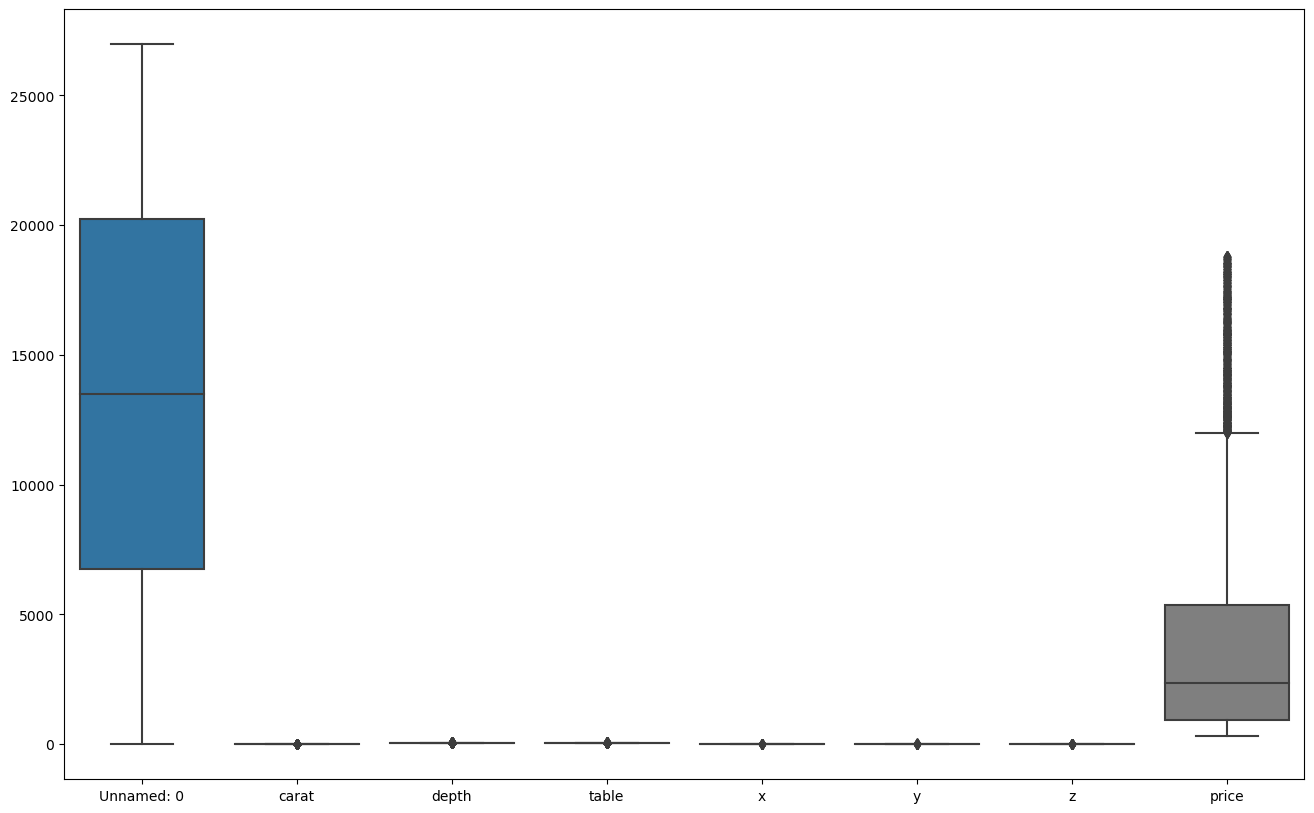

In [63]:
plt.figure(figsize=(16,10))
sns.boxplot(dataset)

In [64]:
min_threshold,max_threshold=dataset.price.quantile([0.001,0.95])

min_threshold,max_threshold

(364.269, 13206.55)

In [65]:
dataset[dataset.price<min_threshold]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
1136,1137,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
4021,4022,0.31,Very Good,J,SI1,62.7,59.0,4.29,4.32,2.70,363
4713,4714,0.30,Ideal,I,SI2,62.0,54.0,4.31,4.34,2.68,348
6378,6379,0.23,Ideal,G,SI1,62.0,54.0,3.95,3.99,2.46,364
6484,6485,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
7275,7276,0.25,Ideal,G,SI1,62.3,53.0,4.06,4.09,2.54,363
9978,9979,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
10669,10670,0.30,Good,I,SI2,63.3,56.0,4.26,4.30,2.71,351
11008,11009,0.30,Good,J,SI1,63.8,56.0,4.23,4.26,2.71,351
11633,11634,0.26,Ideal,I,VS1,61.9,56.0,4.08,4.16,2.55,358


In [66]:
dataset[dataset.price>max_threshold]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
62,63,1.80,Very Good,E,SI1,62.2,57.0,7.81,7.89,4.88,17273
102,103,1.69,Ideal,F,VS2,62.2,57.0,7.59,7.66,4.74,16789
124,125,2.80,Premium,I,SI2,61.1,59.0,9.03,8.98,5.50,15030
130,131,1.56,Premium,G,VS2,61.9,58.0,7.44,7.40,4.59,13299
135,136,2.20,Ideal,G,SI2,59.9,57.0,8.54,8.49,5.10,14691
...,...,...,...,...,...,...,...,...,...,...,...
26898,26899,1.50,Good,G,VS2,61.4,58.8,7.32,7.37,4.50,13307
26907,26908,1.63,Very Good,G,VS1,62.5,60.0,7.43,7.51,4.67,14404
26924,26925,2.03,Good,H,SI2,59.6,61.0,8.16,8.21,4.88,14720
26934,26935,1.75,Ideal,I,SI1,61.8,56.0,7.67,7.71,4.75,13393


In [67]:
max(dataset.price)

18818

In [68]:
dataset=dataset[dataset.price<max_threshold]
dataset.shape

(24956, 11)

In [69]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataset["cut"]= labelencoder.fit_transform(dataset["cut"])
dataset["color"]= labelencoder.fit_transform(dataset["color"])
dataset["clarity"]= labelencoder.fit_transform(dataset["clarity"])

In [70]:
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,2,4,1,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,4,2,7,61.8,56.0,4.19,4.20,2.60,682


In [71]:
# Dividing the dataset into independant and dependant variables
#X=pd.DataFrame(columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity'],data=dataset)
#y=pd.DataFrame(columns=['median_house_value'],data=dataset)

In [72]:
#Creating the dummy values for ocean_proximity

#X = pd.get_dummies(data = X, columns = ['ocean_proximity'] , prefix = ['ocean_proximity'] , drop_first = True)

In [73]:
#X

In [74]:
#define the features and the labels, X and y
X = dataset.drop(['price'], axis=1)
y = dataset['price']

In [75]:
X

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,2,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70
2,3,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78
3,4,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96
4,5,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09
26963,26964,0.33,2,4,1,61.9,55.0,4.44,4.42,2.74
26964,26965,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17
26965,26966,0.27,4,2,7,61.8,56.0,4.19,4.20,2.60


<Axes: >

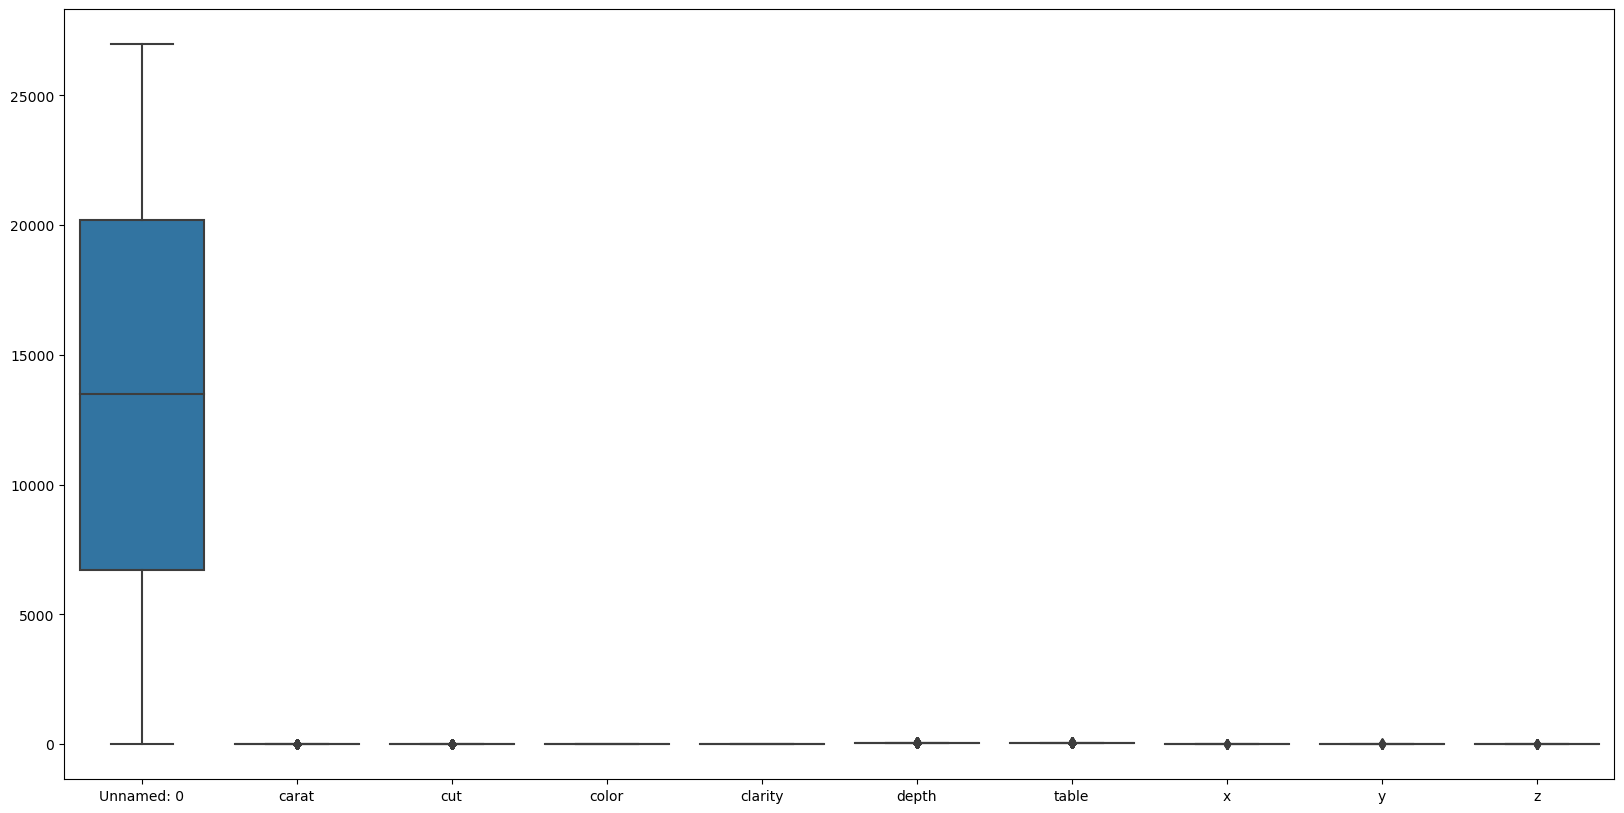

In [76]:
plt.figure(figsize=(20,10))
sns.boxplot(X)

In [77]:
y

0         499
1         984
2        6289
3        1082
4         779
         ... 
26962    5408
26963    1114
26964    1656
26965     682
26966    5166
Name: price, Length: 24956, dtype: int64

<Axes: >

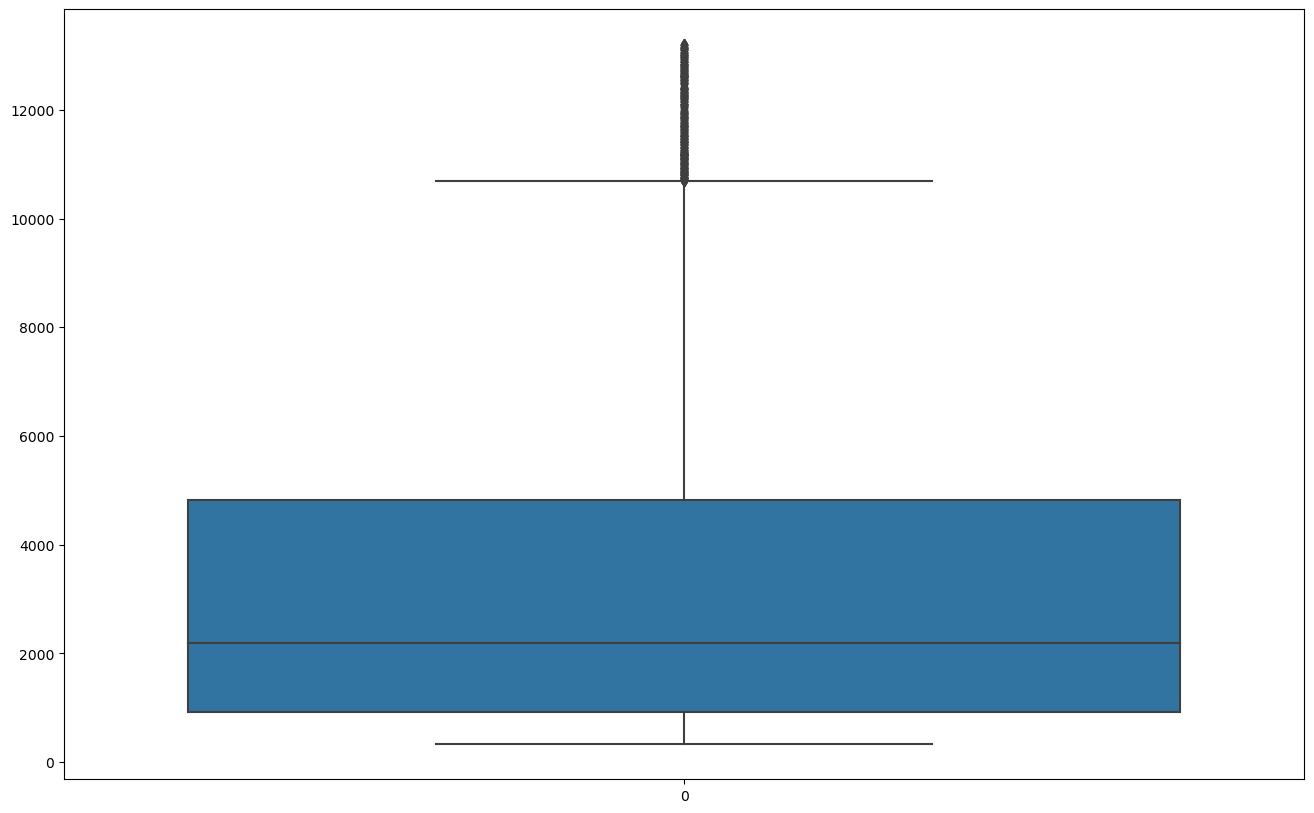

In [78]:
plt.figure(figsize=(16,10))
sns.boxplot(y)

In [79]:
#Creating the dummy values for ocean_proximity

#X = pd.get_dummies(data = X, columns = ['cut','color','clarity'] , prefix = ['cut','color','clarity'] , drop_first = True)
#X

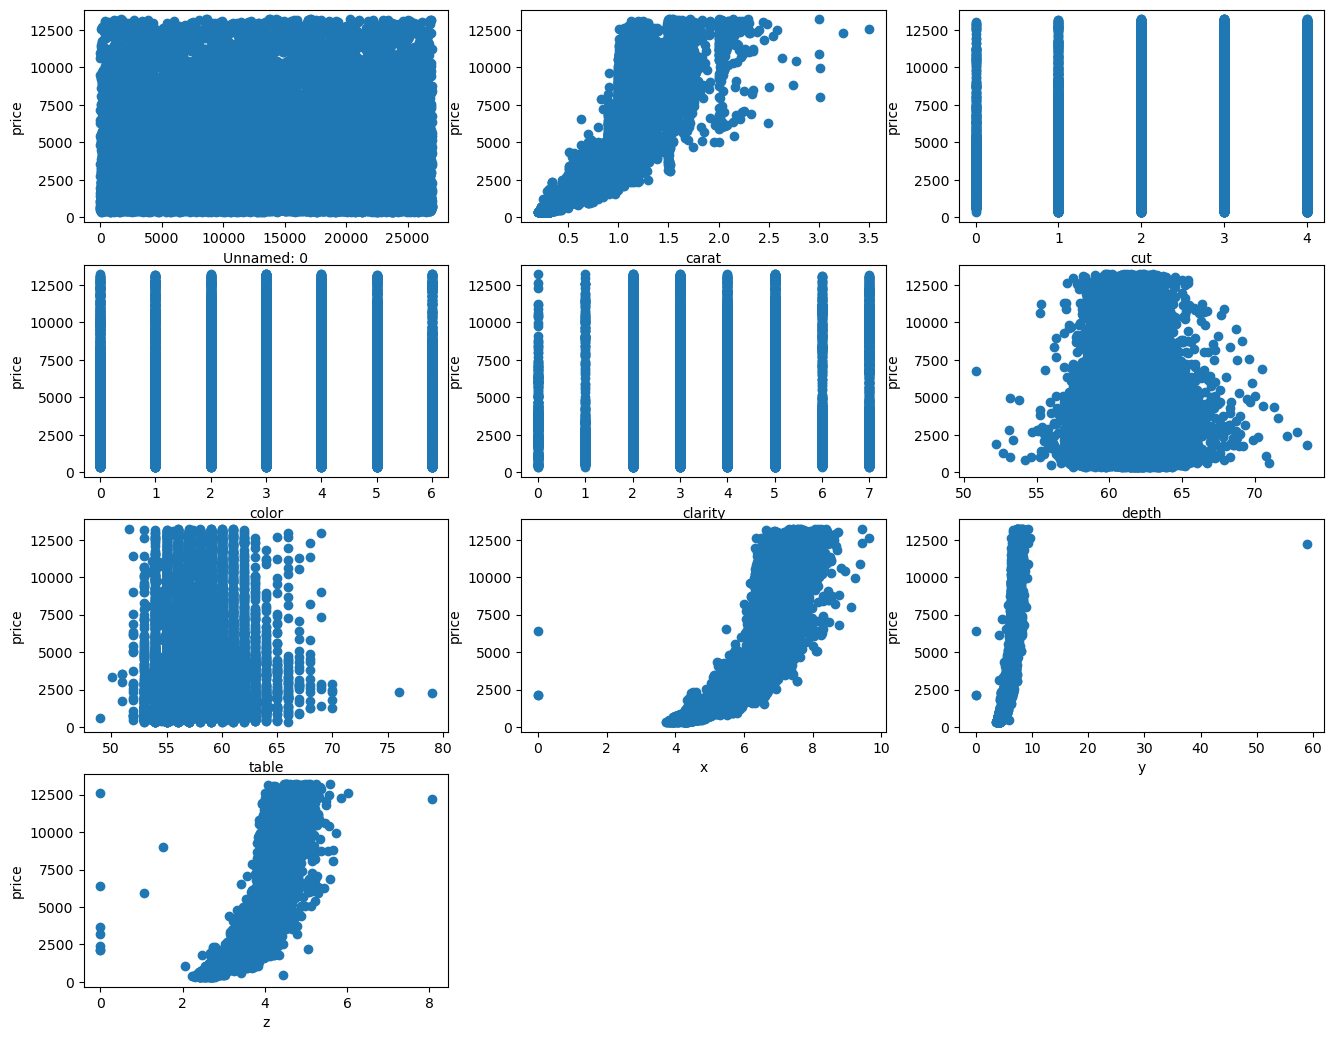

In [80]:
# visiualize all variables  with median_house_priceprice)
from scipy import stats
#creates figure
plt.figure(figsize=(16, 16))

for i, col in enumerate(X.columns[:]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = X[col] #x-axis
    y = y #y-axis
    plt.xlabel(col)
    plt.ylabel('price')
    plt.plot(x, y, 'o')


In [81]:
#min_threshold,max_threshold=dataset.median_house_value

In [82]:
print(f"the shape of the inputs x is: {X.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (24956, 10)
the shape of the targets y is: (24956,)


In [83]:
type(y)

pandas.core.series.Series

In [84]:
type(X)

pandas.core.frame.DataFrame

In [85]:
from sklearn.model_selection import train_test_split
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_ and y_.
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.30, random_state=1)

# Split the 30% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
#del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (17469, 10)
the shape of the training set (target) is: (17469,)

the shape of the cross validation set (input) is: (3743, 10)
the shape of the cross validation set (target) is: (3743,)

the shape of the test set (input) is: (3744, 10)
the shape of the test set (target) is: (3744,)


In [86]:
X_.shape

(7487, 10)

In [87]:
y_train.shape

(17469,)

In [88]:
import numpy as np
y_train = np.expand_dims(y_train, axis=-1)
y_ = np.expand_dims(y_, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)
y_cv = np.expand_dims(y_cv, axis=-1)

In [89]:
#Feature Standardization

from sklearn.preprocessing import StandardScaler

# Initialize the class
scaler = StandardScaler()

# Compute the mean and standard deviation of the training set,cv set,test set then transform it
X_train = scaler.fit_transform(X_train)
X_cv = scaler.fit_transform(X_cv)
X_test = scaler.transform(X_test)
X_ = scaler.transform(X_)
y_train = scaler.fit_transform(y_train)
y_cv = scaler.fit_transform(y_cv)
y_test = scaler.transform(y_test)
y_ = scaler.transform(y_)

In [90]:
import pandas as pd
import numpy as np

# Define the function to return the SMAPE value
def calculate_smape(actual, predicted) -> float:

	# Convert actual and predicted to numpy
	# array data type if not already
	if not all([isinstance(actual, np.ndarray),
				isinstance(predicted, np.ndarray)]):
		actual, predicted = np.array(actual),np.array(predicted)

	return round(
		np.mean(
			np.abs(predicted - actual) /
			((np.abs(predicted) + np.abs(actual))/2)
		)*100, 2
	)


## Linear regression

In [91]:
from sklearn.linear_model import LinearRegression
import time

In [92]:
X_test_new=X_
y_test_new=y_

In [93]:
X_train_array = np.asarray(X_train)
y_train_array   = np.asarray(y_train)
X_test_new_array = np.asarray(X_test_new)
y_test_new_array   = np.asarray(y_test_new)
print(X_train_array.shape)
print(y_train_array.shape)

(17469, 10)
(17469, 1)


In [94]:
lm = LinearRegression()
t0 = time.time()
lm.fit(X_train, y_train)
print("Training time:", time.time()-t0)

Training time: 0.09427285194396973


In [95]:
lm.coef_

array([[-0.00325006,  1.18855983,  0.01771238, -0.11842864,  0.14438518,
        -0.05765298, -0.05807235, -0.25426008,  0.00130947,  0.05763526]])

In [96]:
#values from 0 to 1
#0 model explain None of the variability
#1 model explain Entire of the variability
lm.score(X_train,y_train)

0.8787557410101666

In [97]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [98]:
# model evaluation for training set
y_train_predict = lm.predict(X_train)
mse = (mean_squared_error(y_train, y_train_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_train, y_train_predict)
#print(y_train_predict.shape)
#mape = mape(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('MAPE score is {}'.format(mape))
print("\n")

The model performance for training set
--------------------------------------
MSE is 0.12124425898983332
RMSE is 0.3482014632218442
R2 score is 0.8787557410101666




In [99]:
# model evaluation for testing set
y_test_predict = lm.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
#mape=mape(y_, y_test_predict)
smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('SMAPE score is {}'.format(smape))

The model performance for testing set
--------------------------------------
MSE is 0.11983416849781604
RMSE is 0.3461707216068627
R2 score is 0.8805136412749519
SMAPE score is 42.81


In [100]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 0.8862661416478494


## Random forest

In [102]:
# Configure the model.
#model= tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION,verbose=2)
#t0 = time.time()

# Train the model.
#model.fit(X_train,y_train)
#print("Training time:", time.time()-t0)

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
model_ran = RandomForestRegressor(random_state=0)

In [106]:
y_train_dim = np.squeeze(y_train, axis=-1)
print(y_train_dim.shape)

(17469,)


In [107]:
t0 = time.time()

# Train the model.
model_ran.fit(X_train,y_train_dim)
print("Training time:", time.time()-t0)

Training time: 26.797444820404053


In [111]:
# Evaluate the model on the test dataset.
#model_ran.compile(metrics=["mse"])
#evaluation = model_ran.evaluate(X_,y_, return_dict=True)

#print(evaluation)
#print()
#print(f"MSE: {evaluation['mse']}")
#print(f"RMSE: {math.sqrt(evaluation['mse'])}")

In [112]:
# model evaluation for testing set
y_test_predict = model_ran.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('SMAPE score is {}'.format(smape))

The model performance for testing set
--------------------------------------
MSE is 0.023562003366162904
RMSE is 0.15349919663035017
R2 score is 0.9765063835984189
SMAPE score is 128.17


In [113]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 0.359655488142916


## XGBOOST

In [116]:
#model_2 = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION,verbose=2)
import xgboost as xgb

In [117]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=123, n_estimators=10)

In [118]:
# Fit the regressor to the training set
t0 = time.time()
xg_reg.fit(X_train, y_train)
print("Training time:", time.time()-t0)
# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

Training time: 0.8109402656555176
RMSE: 0.165661


In [120]:
#print(model_2.summary())

In [121]:
# Evaluate the model on the test dataset.
#model_2.compile(metrics=["mse"])
#evaluation = model_2.evaluate(X_,y_, return_dict=True)

#print(evaluation)
#print()
#print(f"MSE: {evaluation['mse']}")
#print(f"RMSE: {math.sqrt(evaluation['mse'])}")

In [123]:
# model evaluation for testing set
y_test_predict = xg_reg.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('SMAPE score is {}'.format(smape))

The model performance for testing set
--------------------------------------
MSE is 0.027655787165966235
RMSE is 0.16630029214035144
R2 score is 0.9724244817020077
SMAPE score is 128.55


In [124]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 0.4018792576963924


# Guassian process regression

In [125]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
  
# create the squared exponential (RBF) kernel
kernel = RBF()
  
# create the Gaussian process regressor with the RBF kernel
gp = GaussianProcessRegressor(kernel=kernel)
  

In [ ]:
t0 = time.time()
# fit the model to the data
gp.fit(X_train, y_train)

print("Training time:", time.time()-t0)

In [ ]:
# model evaluation for testing set
y_test_predict = gp.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
#smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('SMAPE score is {}'.format(smape))

## Neural Network


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = Sequential()

model.add(Dense(150, activation='relu',input_shape=(n_cols,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1650      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92401 (360.94 KB)
Trainable params: 92401 

In [ ]:
X_train = np.asarray(X_train)
y_train   = np.asarray(y_train)
print(X_train.shape)
print(y_train.shape)

(17469, 10)
(17469, 1)


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
546/546 [==============================] - 4s 4ms/step - loss: 0.1270 - mae: 0.1943 - val_loss: 0.0730 - val_mae: 0.1574
Epoch 2/300
546/546 [==============================] - 3s 6ms/step - loss: 0.0693 - mae: 0.1564 - val_loss: 0.0676 - val_mae: 0.1487
Epoch 3/300
546/546 [==============================] - 3s 6ms/step - loss: 0.0668 - mae: 0.1516 - val_loss: 0.0641 - val_mae: 0.1425
Epoch 4/300
546/546 [==============================] - 2s 3ms/step - loss: 0.0845 - mae: 0.1499 - val_loss: 0.0596 - val_mae: 0.1425
Epoch 5/300
546/546 [==============================] - 2s 4ms/step - loss: 0.0447 - mae: 0.1231 - val_loss: 0.0346 - val_mae: 0.1091
Epoch 6/300
546/546 [==============================] - 2s 3ms/step - loss: 0.0345 - mae: 0.1098 - val_loss: 0.0262 - val_mae: 0.0960
Epoch 7/300
546/546 [==============================] - 2s 4ms/step - loss: 0.0280 - mae: 0.1004 - val_loss: 0.0253 - val_mae: 0.0937
Epoch 8/300
546/546 [==============================] - 2s 4ms/step - 

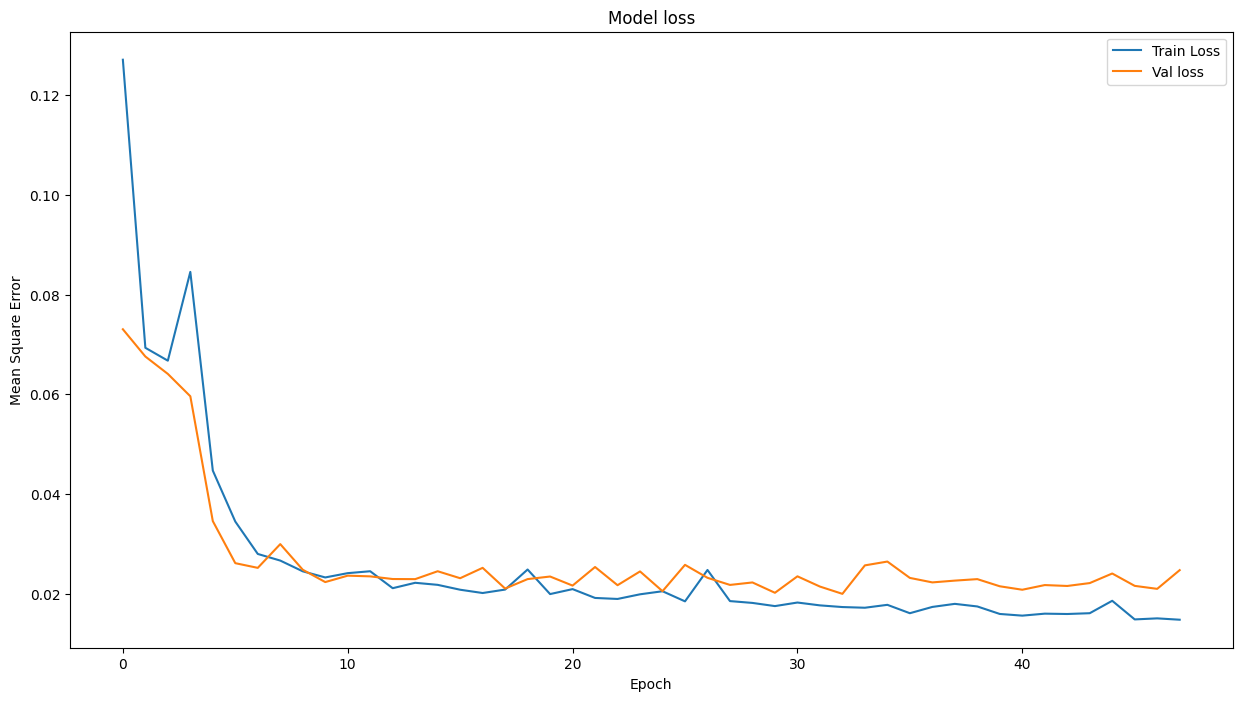

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

546/546 [==============================] - 1s 2ms/step - loss: 0.0141 - mae: 0.0729
Mean square error:  0.014140648767352104
Root Mean square error:  0.11891445987495425
Mean absolute error:  0.0729411169886589


In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

117/117 [==============================] - 0s 2ms/step - loss: 0.0239 - mae: 0.0898
Mean square error:  0.023911302909255028
Root Mean square error:  0.15463280023738504
Mean absolute error:  0.08982112258672714


In [ ]:
# model evaluation for testing set
y_test_predict = model.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('SMAPE score is {}'.format(smape))

234/234 [==============================] - 1s 2ms/step
The model performance for testing set
--------------------------------------
MSE is 0.024354373713002427
RMSE is 0.1560588789944437
R2 score is 0.9757163130476536
SMAPE score is 20.46


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 0.4126962083287174


model1

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model1 = Sequential()

model1.add(Dense(7, activation='relu',input_shape=(n_cols,)))

model1.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model1.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 7)                 77        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 85 (340.00 Byte)
Trainable params: 85 (340.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model1.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
546/546 [==============================] - 2s 3ms/step - loss: 0.3338 - mae: 0.3990 - val_loss: 0.1396 - val_mae: 0.2623
Epoch 2/300
546/546 [==============================] - 1s 3ms/step - loss: 0.1224 - mae: 0.2287 - val_loss: 0.0991 - val_mae: 0.2057
Epoch 3/300
546/546 [==============================] - 2s 3ms/step - loss: 0.0991 - mae: 0.1957 - val_loss: 0.0906 - val_mae: 0.1897
Epoch 4/300
546/546 [==============================] - 4s 7ms/step - loss: 0.0912 - mae: 0.1848 - val_loss: 0.0872 - val_mae: 0.1831
Epoch 5/300
546/546 [==============================] - 1s 2ms/step - loss: 0.0864 - mae: 0.1797 - val_loss: 0.0856 - val_mae: 0.1792
Epoch 6/300
546/546 [==============================] - 1s 2ms/step - loss: 0.0837 - mae: 0.1762 - val_loss: 0.0840 - val_mae: 0.1759
Epoch 7/300
546/546 [==============================] - 1s 2ms/step - loss: 0.0822 - mae: 0.1740 - val_loss: 0.0838 - val_mae: 0.1755
Epoch 8/300
546/546 [==============================] - 1s 2ms/step - 

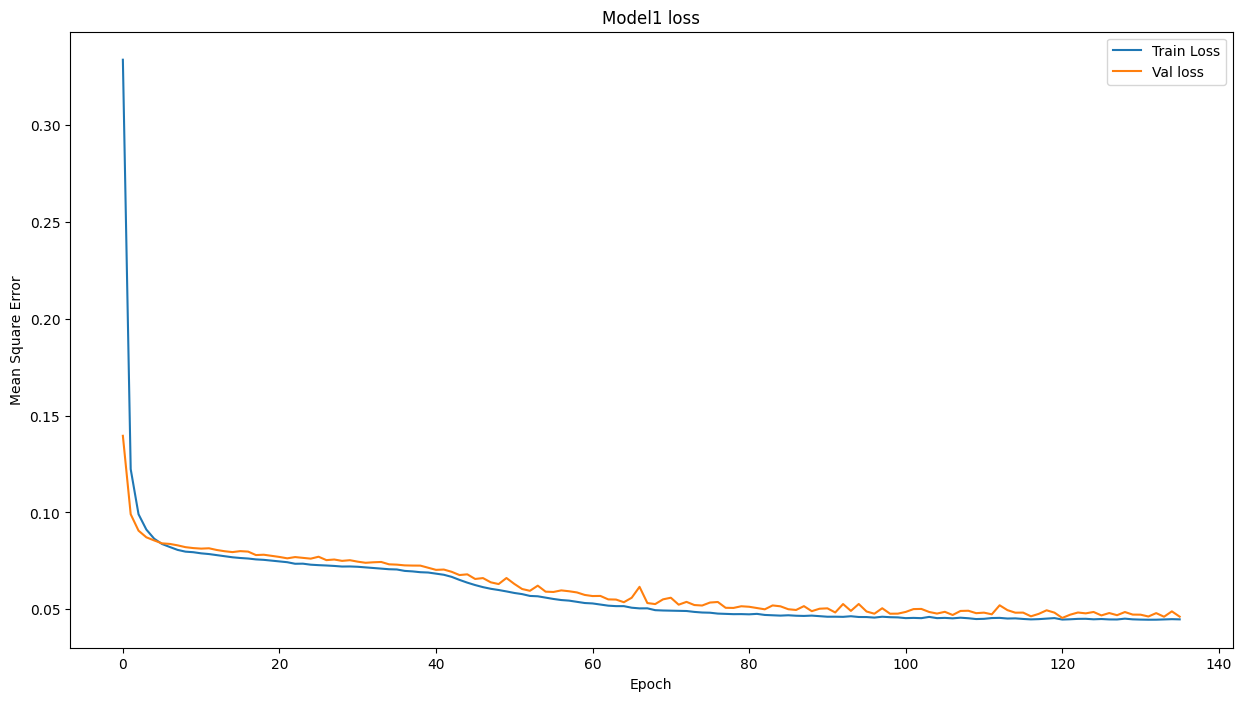

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model1 loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model1.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

546/546 [==============================] - 1s 3ms/step - loss: 0.0443 - mae: 0.1272
Mean square error:  0.04428505897521973
Root Mean square error:  0.21044015532977475
Mean absolute error:  0.12723208963871002


In [ ]:
#check the model performace in test dataset
score = model1.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

117/117 [==============================] - 0s 3ms/step - loss: 0.0447 - mae: 0.1309
Mean square error:  0.04474271088838577
Root Mean square error:  0.21152472878693349
Mean absolute error:  0.13086454570293427


In [ ]:
# model evaluation for testing set
y_test_predict = model1.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('SMAPE score is {}'.format(smape))

234/234 [==============================] - 1s 2ms/step
The model performance for testing set
--------------------------------------
MSE is 0.04546853721714355
RMSE is 0.213233527422738
R2 score is 0.9546634318347206
SMAPE score is 27.33


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 0.5702063272457171


model2

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model2 = Sequential()

model2.add(Dense(9, activation='relu',input_shape=(n_cols,)))

model2.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model2.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 9)                 99        
                                                                 
 dense_9 (Dense)             (None, 1)                 10        
                                                                 
Total params: 109 (436.00 Byte)
Trainable params: 109 (436.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model2.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
546/546 [==============================] - 3s 4ms/step - loss: 0.1664 - mae: 0.2854 - val_loss: 0.0891 - val_mae: 0.1939
Epoch 2/300
546/546 [==============================] - 1s 2ms/step - loss: 0.0875 - mae: 0.1827 - val_loss: 0.0816 - val_mae: 0.1771
Epoch 3/300
546/546 [==============================] - 1s 2ms/step - loss: 0.0802 - mae: 0.1740 - val_loss: 0.0802 - val_mae: 0.1757
Epoch 4/300
546/546 [==============================] - 1s 2ms/step - loss: 0.0775 - mae: 0.1723 - val_loss: 0.0781 - val_mae: 0.1739
Epoch 5/300
546/546 [==============================] - 1s 3ms/step - loss: 0.0758 - mae: 0.1697 - val_loss: 0.0770 - val_mae: 0.1734
Epoch 6/300
546/546 [==============================] - 1s 3ms/step - loss: 0.0746 - mae: 0.1684 - val_loss: 0.0766 - val_mae: 0.1722
Epoch 7/300
546/546 [==============================] - 1s 2ms/step - loss: 0.0737 - mae: 0.1669 - val_loss: 0.0747 - val_mae: 0.1686
Epoch 8/300
546/546 [==============================] - 1s 2ms/step - 

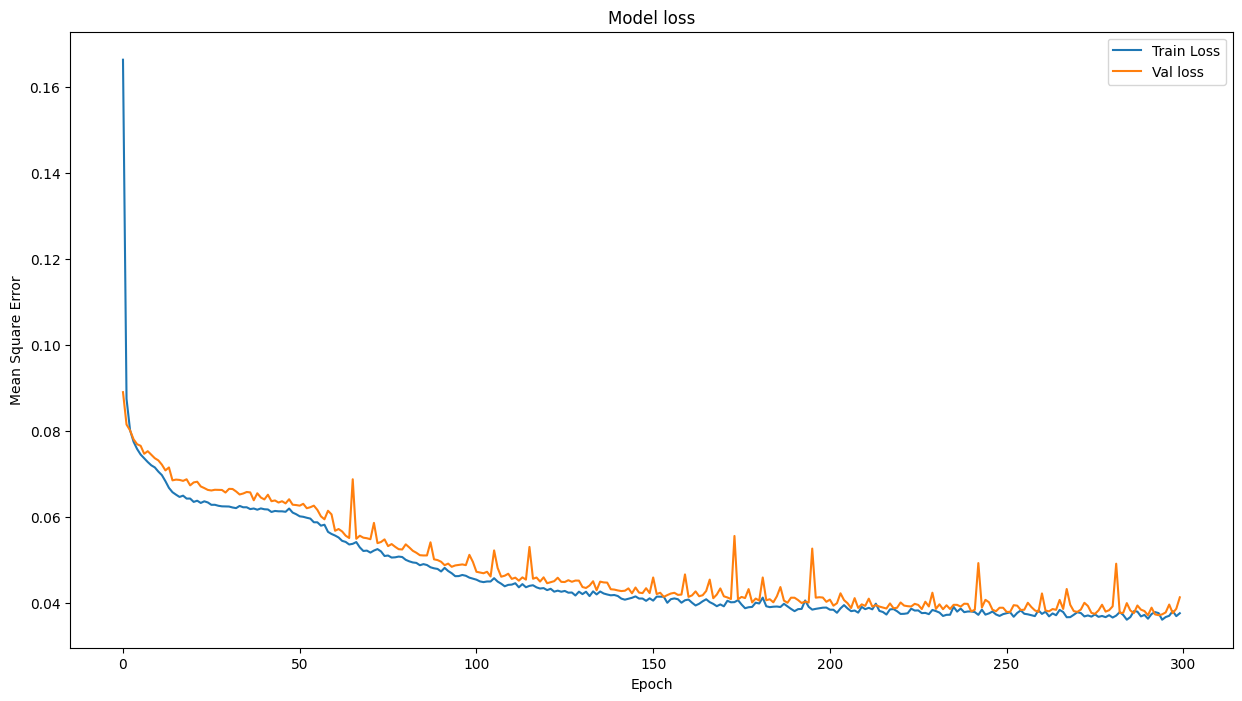

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model2.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

546/546 [==============================] - 1s 3ms/step - loss: 0.0395 - mae: 0.1241
Mean square error:  0.039515018463134766
Root Mean square error:  0.1987838485972509
Mean absolute error:  0.12411484867334366


In [ ]:
#check the model performace in test dataset
score = model2.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

117/117 [==============================] - 0s 2ms/step - loss: 0.0392 - mae: 0.1264
Mean square error:  0.03920720890164375
Root Mean square error:  0.19800810312116965
Mean absolute error:  0.12638533115386963


In [ ]:
# model evaluation for testing set
y_test_predict = model2.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('SMAPE score is {}'.format(smape))


234/234 [==============================] - 0s 2ms/step
The model performance for testing set
--------------------------------------
MSE is 0.04027978772557373
RMSE is 0.20069825042977762
R2 score is 0.9598371213663122
SMAPE score is 27.64


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 0.5698728728333317


model3

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model3 = Sequential()

model3.add(Dense(393, activation='relu',input_shape=(n_cols,)))
model3.add(Dense(79, activation='relu'))

model3.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model3.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 393)               4323      
                                                                 
 dense_11 (Dense)            (None, 79)                31126     
                                                                 
 dense_12 (Dense)            (None, 1)                 80        
                                                                 
Total params: 35529 (138.79 KB)
Trainable params: 35529 (138.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model3.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
546/546 [==============================] - 3s 4ms/step - loss: 0.1061 - mae: 0.1794 - val_loss: 0.0703 - val_mae: 0.1579
Epoch 2/300
546/546 [==============================] - 2s 3ms/step - loss: 0.0680 - mae: 0.1532 - val_loss: 0.0730 - val_mae: 0.1564
Epoch 3/300
546/546 [==============================] - 2s 3ms/step - loss: 0.0666 - mae: 0.1476 - val_loss: 0.0771 - val_mae: 0.1636
Epoch 4/300
546/546 [==============================] - 2s 3ms/step - loss: 0.0576 - mae: 0.1362 - val_loss: 0.0517 - val_mae: 0.1309
Epoch 5/300
546/546 [==============================] - 3s 5ms/step - loss: 0.0605 - mae: 0.1266 - val_loss: 0.0460 - val_mae: 0.1260
Epoch 6/300
546/546 [==============================] - 3s 5ms/step - loss: 0.0468 - mae: 0.1147 - val_loss: 0.0367 - val_mae: 0.1101
Epoch 7/300
546/546 [==============================] - 2s 4ms/step - loss: 0.0353 - mae: 0.1089 - val_loss: 0.0343 - val_mae: 0.1094
Epoch 8/300
546/546 [==============================] - 1s 3ms/step - 

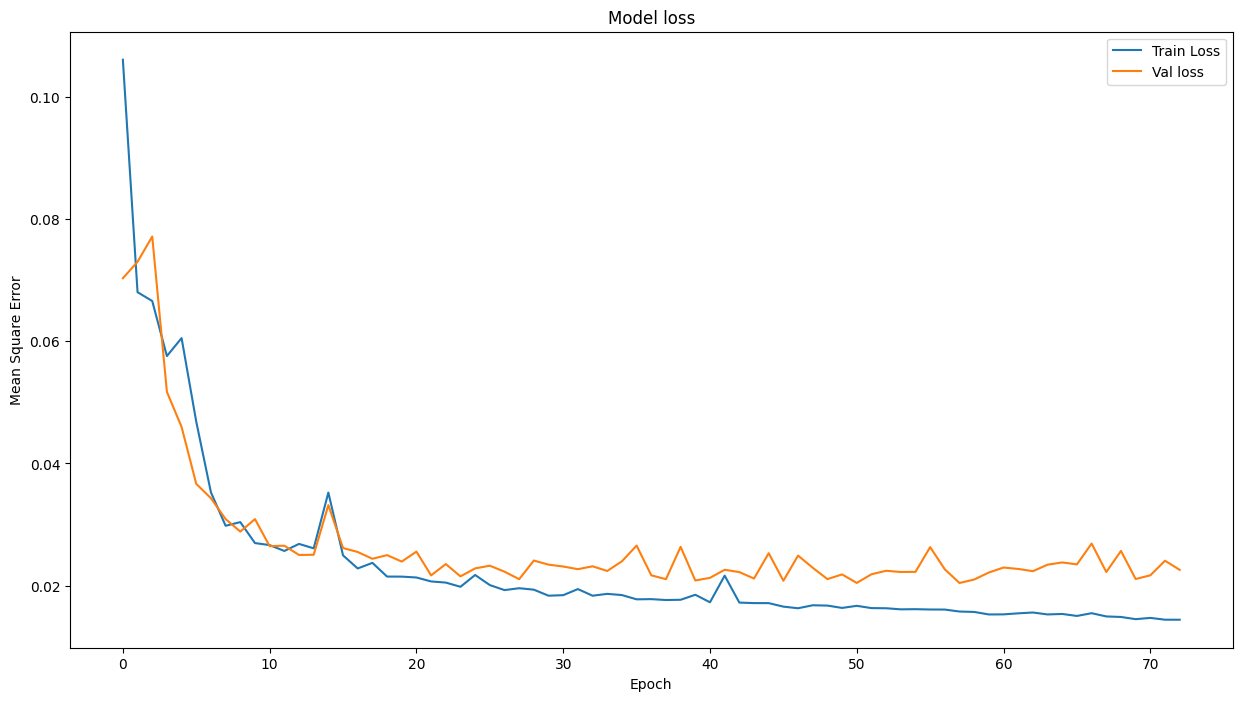

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model3.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

546/546 [==============================] - 1s 2ms/step - loss: 0.0142 - mae: 0.0724
Mean square error:  0.014202998951077461
Root Mean square error:  0.11917633553301368
Mean absolute error:  0.07238390296697617


In [ ]:
#check the model performace in test dataset
score = model3.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

117/117 [==============================] - 0s 3ms/step - loss: 0.0223 - mae: 0.0920
Mean square error:  0.022310368716716766
Root Mean square error:  0.14936655822745856
Mean absolute error:  0.09197911620140076


In [ ]:
# model evaluation for testing set
y_test_predict = model3.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('SMAPE score is {}'.format(smape))

234/234 [==============================] - 1s 2ms/step
The model performance for testing set
--------------------------------------
MSE is 0.022453675824282666
RMSE is 0.14984550652015785
R2 score is 0.9776114943019355
SMAPE score is 20.71


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 0.3666647788364653


model4

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model4 = Sequential()

model4.add(Dense(16, activation='relu',input_shape=(n_cols,)))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(4, activation='relu'))
model4.add(Dense(2, activation='relu'))



model4.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model4.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                176       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
 dense_16 (Dense)            (None, 2)                 10        
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model4.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
546/546 [==============================] - 3s 3ms/step - loss: 0.3252 - mae: 0.4593 - val_loss: 0.1498 - val_mae: 0.3133
Epoch 2/300
546/546 [==============================] - 1s 2ms/step - loss: 0.1367 - mae: 0.2608 - val_loss: 0.0947 - val_mae: 0.2246
Epoch 3/300
546/546 [==============================] - 1s 2ms/step - loss: 0.0910 - mae: 0.2011 - val_loss: 0.0797 - val_mae: 0.1870
Epoch 4/300
546/546 [==============================] - 1s 3ms/step - loss: 0.0781 - mae: 0.1759 - val_loss: 0.0750 - val_mae: 0.1717
Epoch 5/300
546/546 [==============================] - 1s 2ms/step - loss: 0.0742 - mae: 0.1664 - val_loss: 0.0732 - val_mae: 0.1674
Epoch 6/300
546/546 [==============================] - 1s 3ms/step - loss: 0.0720 - mae: 0.1624 - val_loss: 0.0696 - val_mae: 0.1606
Epoch 7/300
546/546 [==============================] - 2s 3ms/step - loss: 0.0699 - mae: 0.1590 - val_loss: 0.0692 - val_mae: 0.1600
Epoch 8/300
546/546 [==============================] - 2s 4ms/step - 

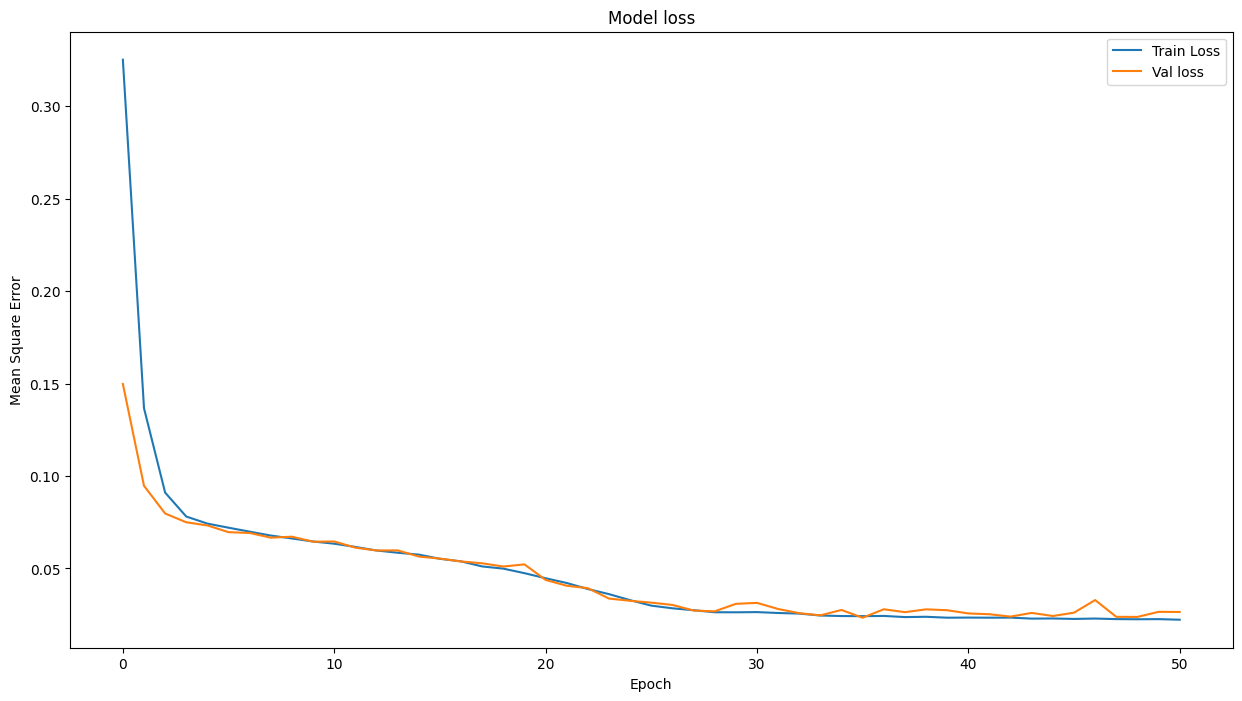

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model4.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

546/546 [==============================] - 1s 2ms/step - loss: 0.0214 - mae: 0.0920
Mean square error:  0.021420303732156754
Root Mean square error:  0.1463567686584968
Mean absolute error:  0.09195499122142792


In [ ]:
#check the model performace in test dataset
score = model4.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

117/117 [==============================] - 0s 2ms/step - loss: 0.0257 - mae: 0.0988
Mean square error:  0.02565879561007023
Root Mean square error:  0.16018363090550242
Mean absolute error:  0.0987761989235878


In [ ]:
# model evaluation for testing set
y_test_predict = model4.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('SMAPE score is {}'.format(smape))

234/234 [==============================] - 0s 1ms/step
The model performance for testing set
--------------------------------------
MSE is 0.026042937438243225
RMSE is 0.16137824338566592
R2 score is 0.9740326502531986
SMAPE score is 22.2


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 0.4571678532108703


model5

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model5 = Sequential()

model5.add(Dense(9, activation='relu',input_shape=(n_cols,)))
model5.add(Dense(9, activation='relu'))
model5.add(Dense(9, activation='relu'))
model5.add(Dense(8, activation='relu'))

model5.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model5.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 9)                 99        
                                                                 
 dense_19 (Dense)            (None, 9)                 90        
                                                                 
 dense_20 (Dense)            (None, 9)                 90        
                                                                 
 dense_21 (Dense)            (None, 8)                 80        
                                                                 
 dense_22 (Dense)            (None, 1)                 9         
                                                                 
Total params: 368 (1.44 KB)
Trainable params: 368 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model5.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
546/546 [==============================] - 3s 3ms/step - loss: 0.3500 - mae: 0.3682 - val_loss: 0.0892 - val_mae: 0.1939
Epoch 2/300
546/546 [==============================] - 1s 2ms/step - loss: 0.1190 - mae: 0.1873 - val_loss: 0.0825 - val_mae: 0.1770
Epoch 3/300
546/546 [==============================] - 1s 3ms/step - loss: 0.0860 - mae: 0.1737 - val_loss: 0.0796 - val_mae: 0.1713
Epoch 4/300
546/546 [==============================] - 2s 3ms/step - loss: 0.0759 - mae: 0.1666 - val_loss: 0.0763 - val_mae: 0.1632
Epoch 5/300
546/546 [==============================] - 2s 4ms/step - loss: 0.0737 - mae: 0.1627 - val_loss: 0.0769 - val_mae: 0.1637
Epoch 6/300
546/546 [==============================] - 2s 4ms/step - loss: 0.0705 - mae: 0.1587 - val_loss: 0.0697 - val_mae: 0.1564
Epoch 7/300
546/546 [==============================] - 2s 4ms/step - loss: 0.0681 - mae: 0.1561 - val_loss: 0.0674 - val_mae: 0.1549
Epoch 8/300
546/546 [==============================] - 1s 3ms/step - 

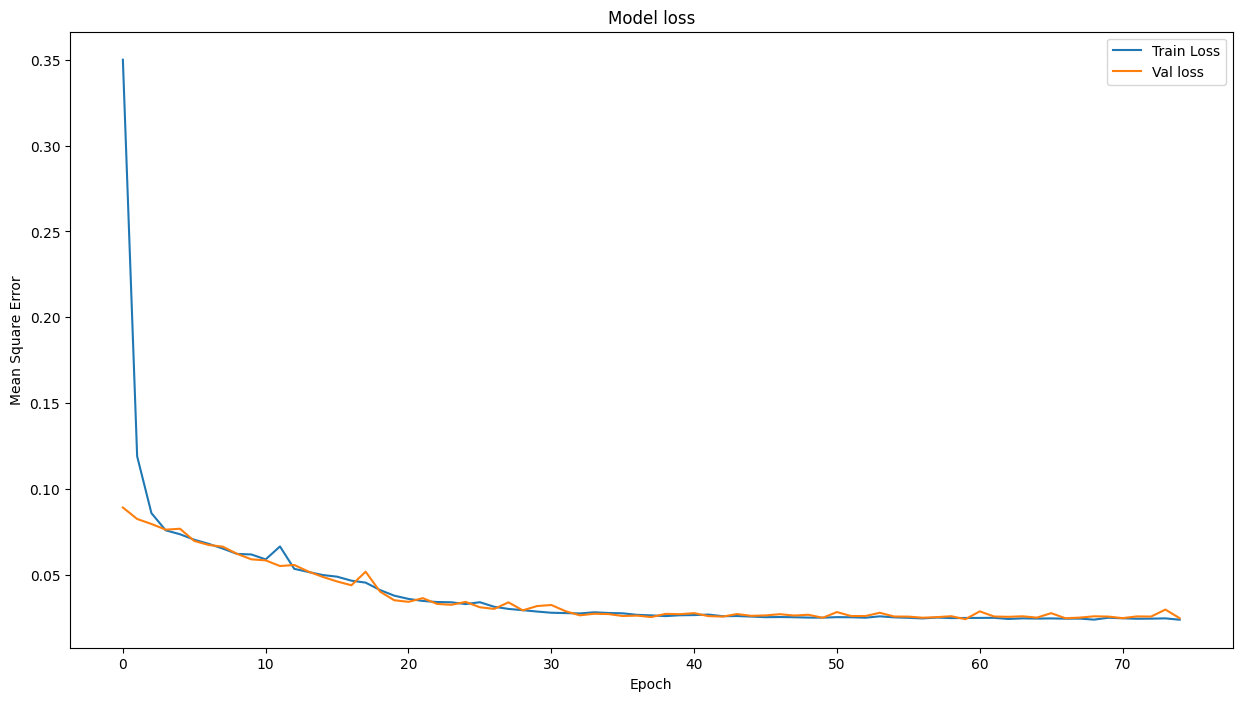

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model5.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

546/546 [==============================] - 1s 2ms/step - loss: 0.0253 - mae: 0.0979
Mean square error:  0.025250853970646858
Root Mean square error:  0.15890517288825703
Mean absolute error:  0.09787184000015259


In [ ]:
#check the model performace in test dataset
score = model5.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

117/117 [==============================] - 0s 2ms/step - loss: 0.0251 - mae: 0.0962
Mean square error:  0.02512235753238201
Root Mean square error:  0.1585003392185077
Mean absolute error:  0.09622133523225784


In [ ]:
# model evaluation for testing set
y_test_predict = model5.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('SMAPE score is {}'.format(smape))

234/234 [==============================] - 0s 1ms/step
The model performance for testing set
--------------------------------------
MSE is 0.024941716811966445
RMSE is 0.15792946783917955
R2 score is 0.9751306746684064
SMAPE score is 21.47


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 0.41833372413823133


model6

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model6 = Sequential()

model6.add(Dense(400, activation='relu',input_shape=(n_cols,)))
model6.add(Dense(80, activation='relu'))

model6.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model6.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               4400      
                                                                 
 dense_1 (Dense)             (None, 80)                32080     
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 36561 (142.82 KB)
Trainable params: 36561 (142.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model6.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
546/546 [==============================] - 4s 6ms/step - loss: 0.1198 - mae: 0.1847 - val_loss: 0.0784 - val_mae: 0.1672
Epoch 2/300
546/546 [==============================] - 4s 7ms/step - loss: 0.0698 - mae: 0.1564 - val_loss: 0.0684 - val_mae: 0.1505
Epoch 3/300
546/546 [==============================] - 3s 5ms/step - loss: 0.0664 - mae: 0.1499 - val_loss: 0.0655 - val_mae: 0.1489
Epoch 4/300
546/546 [==============================] - 2s 4ms/step - loss: 0.0581 - mae: 0.1386 - val_loss: 0.0575 - val_mae: 0.1392
Epoch 5/300
546/546 [==============================] - 2s 3ms/step - loss: 0.0479 - mae: 0.1247 - val_loss: 0.0426 - val_mae: 0.1195
Epoch 6/300
546/546 [==============================] - 2s 4ms/step - loss: 0.0381 - mae: 0.1126 - val_loss: 0.0369 - val_mae: 0.1108
Epoch 7/300
546/546 [==============================] - 2s 3ms/step - loss: 0.0338 - mae: 0.1084 - val_loss: 0.0372 - val_mae: 0.1102
Epoch 8/300
546/546 [==============================] - 2s 4ms/step - 

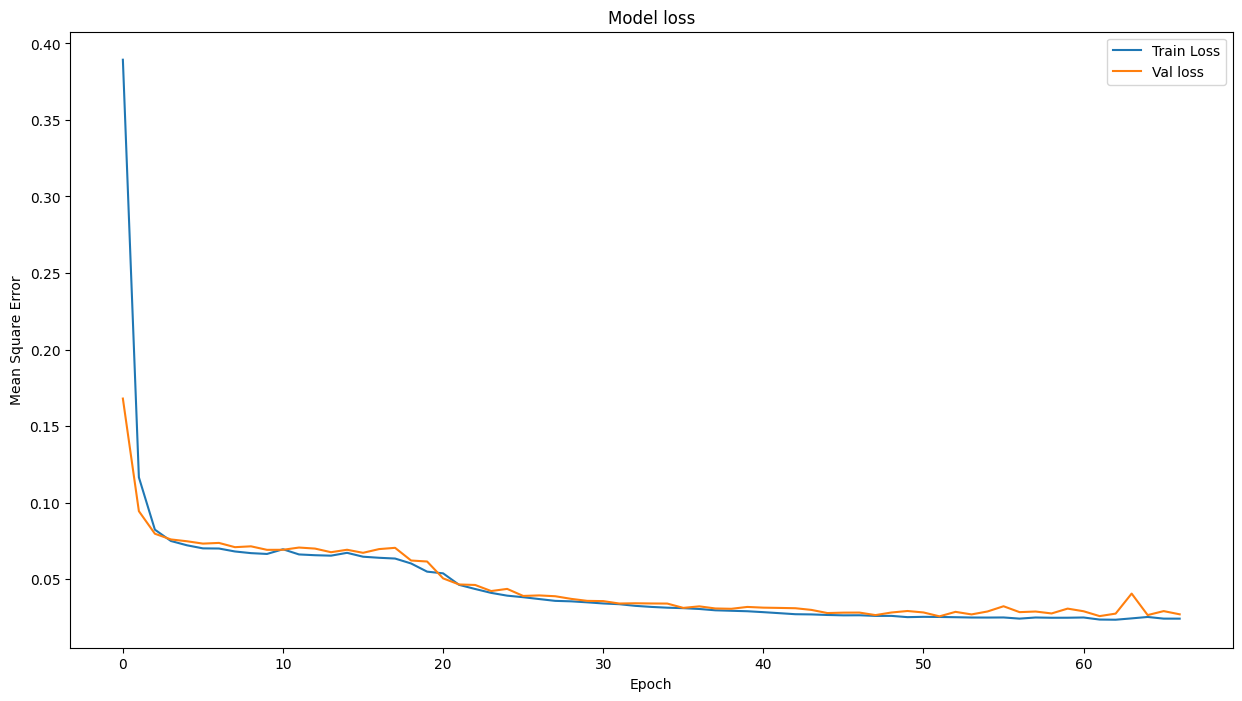

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model6.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

546/546 [==============================] - 1s 2ms/step - loss: 0.0225 - mae: 0.0917
Mean square error:  0.02253258228302002
Root Mean square error:  0.15010856831979985
Mean absolute error:  0.0917145311832428


In [ ]:
#check the model performace in test dataset
score = model6.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

117/117 [==============================] - 0s 2ms/step - loss: 0.0258 - mae: 0.0991
Mean square error:  0.025816118344664574
Root Mean square error:  0.16067395042341048
Mean absolute error:  0.09912988543510437


In [ ]:
# model evaluation for testing set
y_test_predict = model6.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('SMAPE score is {}'.format(smape))

234/234 [==============================] - 0s 2ms/step
The model performance for testing set
--------------------------------------
MSE is 0.0238309766920035
RMSE is 0.15437284959475064
R2 score is 0.9762381909476772
SMAPE score is 20.52


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 0.3920369413987063
